# Tarea de metrticas

# Validación cruzada.

La validación cruzada es una técnica para evaluar la generalización de los modelos estadísticos. Aquí veremos cómo implementar la validación cruzada de K-folds utilizando Scikit-learn.

In [16]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# visitar link inferior para mas detalles de dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

# Cargar un conjunto de datos de ejemplo
data = load_iris()
X = data.data
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Implementación de K-Fold Cross Validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

print(f"Resultados de CV: {cv_results}")
print(f"Promedio de CV: {cv_results.mean():.2f}")

Resultados de CV: [0.91666667 0.95833333 0.91666667 0.83333333 1.        ]
Promedio de CV: 0.93


### Resultados de la Validación Cruzada.

```plaintext
Resultados de CV: [0.91666667 0.95833333 0.91666667 0.83333333 1.        ]
Promedio de CV: 0.93
```

### Análisis de resultados.

Los resultados obtenidos muestran la exactitud de la validación cruzada en cada pliegue, con valores de 0.9167, 0.9583, 0.9167, 0.8333 y 1.0000, respectivamente.

El promedio de exactitud a través de los 5 pliegues es de 0.93, lo que indica que el modelo de Random Forest tiene un buen rendimiento en este conjunto de datos. Esto sugiere que el modelo es robusto y tiene una alta capacidad predictiva para clasificar correctamente las especies de flores en el conjunto de datos Iris.


# Matriz de Confusión.

La matriz de confusión se utiliza para evaluar el rendimiento de un modelo de clasificación.

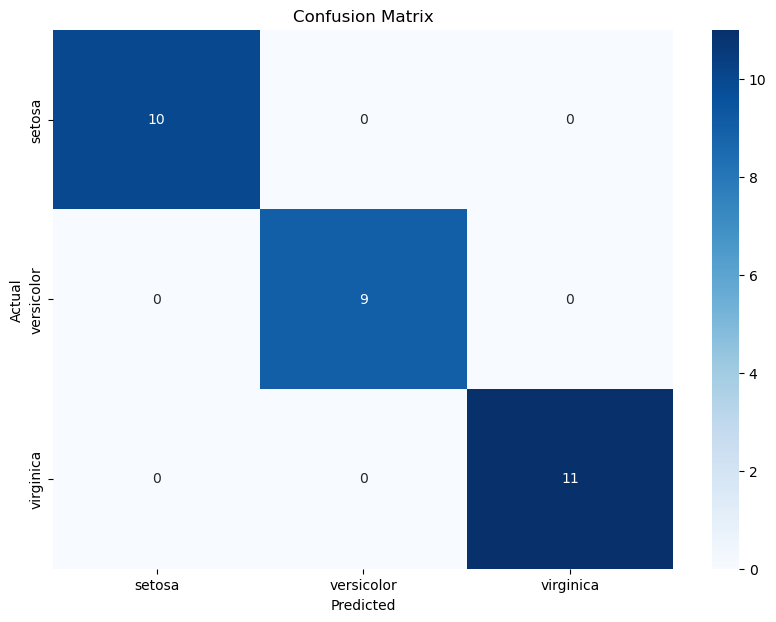

In [18]:
# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando Matplotlib y Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Conclusiones.

##### Setosa
- 10 instancias de Setosa fueron clasificadas correctamente como Setosa.
- 0 instancias de Setosa fueron incorrectamente clasificadas como Versicolor.
- 0 instancias de Setosa fueron incorrectamente clasificadas como Virginica.

##### Versicolor
- 0 instancias de Versicolor fueron incorrectamente clasificadas como Setosa.
- 9 instancias de Versicolor fueron clasificadas correctamente como Versicolor.
- 0 instancias de Versicolor fueron incorrectamente clasificadas como Virginica.

##### Virginica
- 0 instancias de Virginica fueron incorrectamente clasificadas como Setosa.
- 0 instancias de Virginica fueron incorrectamente clasificadas como Versicolor.
- 11 instancias de Virginica fueron clasificadas correctamente como Virginica.

Tales resultados indican que el modelo modelo de Random Forest clasificó todas las instancias en el conjunto de prueba sin errores.

# Métricas de evaluación.

In [39]:
# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

y_pred_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 1.00
Recall: 1.00
Precision: 1.00
F1 Score: 1.00
ROC AUC Score: 1.00


## Conclusiones.
Estos resultados indican un rendimiento sobresaliente del modelo de clasificación. Con una precisión del 100%, el modelo clasifica correctamente todas las muestras. Además, tanto la sensibilidad (recall) como la precisión (precision) también alcanzan el 100%, lo que significa que el modelo identifica correctamente todas las muestras positivas y no presenta falsos positivos.

El puntaje F1, que es una medida combinada de precisión y sensibilidad, también es perfecto en 1.00. El puntaje de área bajo la curva ROC (ROC AUC) también es máximo, lo que sugiere que el modelo es capaz de distinguir perfectamente entre las clases.